In [78]:
import matplotlib. pyplot as plt
import re
import pandas as pd
import random as random
import seaborn as sns
plt.rc('figure', figsize=(15, 6))

In [79]:
%matplotlib inline

In [80]:
summary = pd.read_csv("atusdata/atussum_2013/atussum_2013.dat")
dem_info = pd.read_csv("atusdata/atusrost_2013/atusrost_2013.dat")
summary.head()
combo_data = pd.merge(summary, dem_info, left_on="tucaseid", right_on="TUCASEID")

In [81]:
adults_crit = (summary.TEAGE >= 18)
no_children_crit = (summary.TRCHILDNUM == 0)
adults_with_children = adults_crit & ~ no_children_crit
adults_with_no_children = adults_crit & no_children_crit
times_of_interest_codes = {"Travel": "18",
                           "Work Travel": "1805",
                           "Eating Travel": "1811",
                           "Religious Activity": "14",
                           "Eating and Drinking": "11",
                           "Education": "06",
                           "Work": "05",
                           "Working": "0501",
                           "Housework": "0201",
                           "Laundry": "020102",
                           "Billiards": "130105",
                           "Food Prep and Cleanup": "0202",
                           "Sleep": "0101",
                           "Grooming": "0102"}
times_of_interest = list(times_of_interest_codes.keys())
group_divisions_of_interest = {"Sex": "TESEX_x",
                               "Age": "TEAGE",
                               "Hours worked": "TEHRUSL1",
                               }
                                # "Adults With \ Without Children": [adults_with_children, adults_with_no_children]
groups_of_interest = list(group_divisions_of_interest.keys())
divisions_of_interest = {"adults_crit":  (summary.TEAGE >= 18),
                         "no_children_crit": (summary.TRCHILDNUM == 0)}
plot_bars = {"Sex"}
logical_combos = {"Adults With \ Without Children"}
group_labels = {"Sex": ["Male", "Female"], 
                "Adults With \ Without Children": ["Adults with children", "Adults without children."]}

In [82]:
random.choice(times_of_interest)

'Food Prep and Cleanup'

In [83]:
random.choice(groups_of_interest)

'Age'

In [84]:
data_subset = summary[["TUFINLWGT","TESEX", "t130105"]]

In [85]:
data_subset["billiards"] = data_subset.t130105 * data_subset.TUFINLWGT

In [86]:
male_female = data_subset.groupby(["TESEX"])

In [87]:
male_female_billiards = data_subset['billiards'].groupby(data_subset['TESEX'])

In [88]:
male_female_weights = data_subset['TUFINLWGT'].groupby(data_subset['TESEX'])

In [89]:
male_female_diff = male_female_billiards.sum() / male_female_weights.sum()

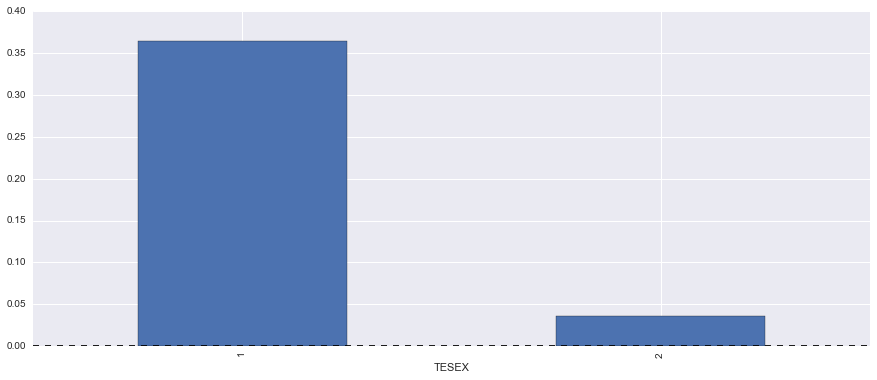

In [90]:
male_female_diff.plot(kind='bar', figsize=(15, 6))

In [91]:
def activity_columns(data, activity_code):
    """For the activity code given, return all columns that fall under that activity."""
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column)]

def plot_diffs(data, group_key, activity_key):
    if group_key in logical_combos:
        groups = group_divisions_of_interest[group_key]
    else:
        group = group_divisions_of_interest[group_key]
    time = times_of_interest_codes[activity_key]
    time_columns = activity_columns(data, time)
    data_subset_list = ["TUFINLWGT", group] + time_columns
    data[activity_key] = data[time_columns].sum(axis=1) * data.TUFINLWGT
    grouped_data = data.groupby(group)
    grouped_data_diff = grouped_data[activity_key].sum() / grouped_data['TUFINLWGT'].sum()
    if group_key in plot_bars:
        grouped_data_diff.plot(figsize=(15, 6), kind='bar')
        plt.xticks(range(len(group_labels[group_key])), group_labels[group_key])
    else:
        grouped_data_diff.plot(figsize=(15, 6))
    plt.title("Time spent on " + activity_key + " by " + group_key)
    plt.ylabel(activity_key + " (minutes)")
    plt.xlabel(group_key)
    plt.show()

In [92]:
def generate_random_plot():
    time = random.choice(times_of_interest)
    group = random.choice(groups_of_interest)
    plot_diffs(combo_data, group, time)

In [93]:
generate_random_plot()

KeyError: 'TEHRUSL1'

In [ ]:
plot_diffs(summary, "Adults With Children" , "Sleep")